In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.duplicated().sum()

1081

In [7]:
data[data.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [8]:
data.shape

(284807, 31)

In [9]:
data.shape[0]

284807

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape[0]

283726

In [12]:
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data['Time'] = scaler.fit_transform(data[['Time']])

In [13]:
X = data.drop('Class', axis=1)
y = data['Class']


In [14]:
# splitting the test test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.035, random_state=42, stratify=y)
# splitting for the training and the validation purpose
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

In [15]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Random Under Sampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# NearMiss
nm = NearMiss(version=1)
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)


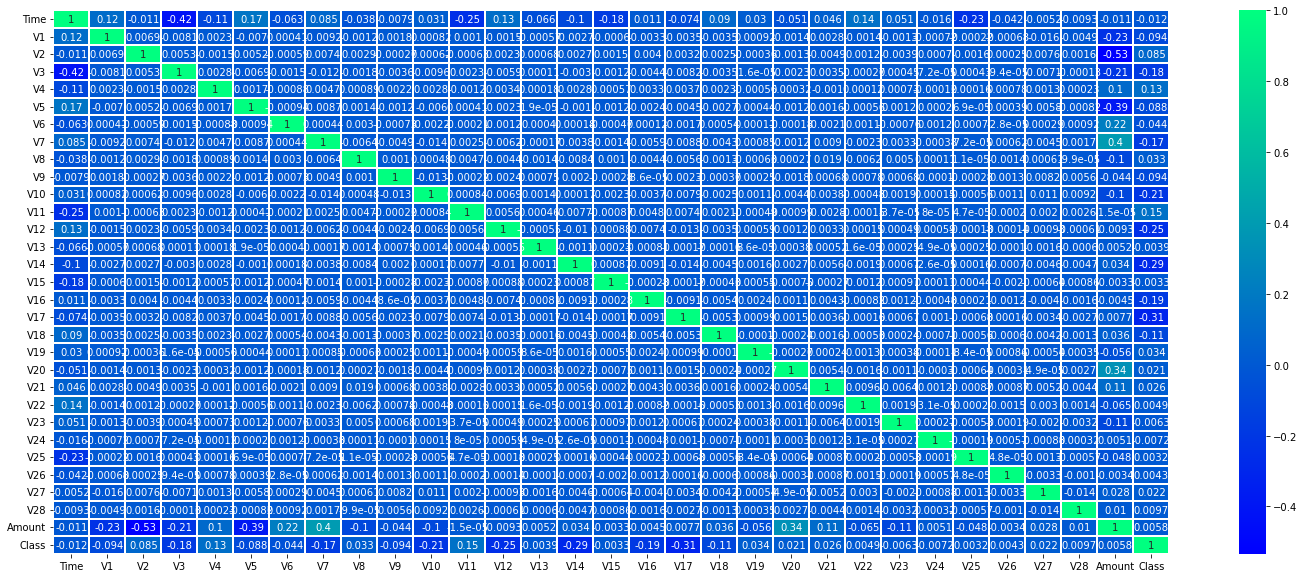

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(25,10)) #This function creates a new figure in which you can plot your data. figsize() parameter sets the width and height of the figure in inches. Here, the figure is 15 inches wide and 10 inches tall.
sns.heatmap(data.corr(),linewidth=0.01,annot=True,cmap="winter") # This function from the Seaborn library creates a heatmap, which is a graphical representation of data where individual values are represented as colors.This computes the pairwise correlation of columns in the DataFrame.Linewidth sets the width of the lines that divide the cells in the heatmap to 0.01 units. Annot parameter ensures that the values of the correlation coefficients are displayed in each cell of the heatmap. Cmap  This sets the colormap of the heatmap to "winter," which is a predefined colormap in Seaborn/Matplotlib. It will color the heatmap in shades of blue and green.If cmap=summer then colour comes to be the shades of yellow and green.
plt.show()
plt.savefig('correlationfigure') # default extension is .png

In [17]:
pip install xgboost catboost

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

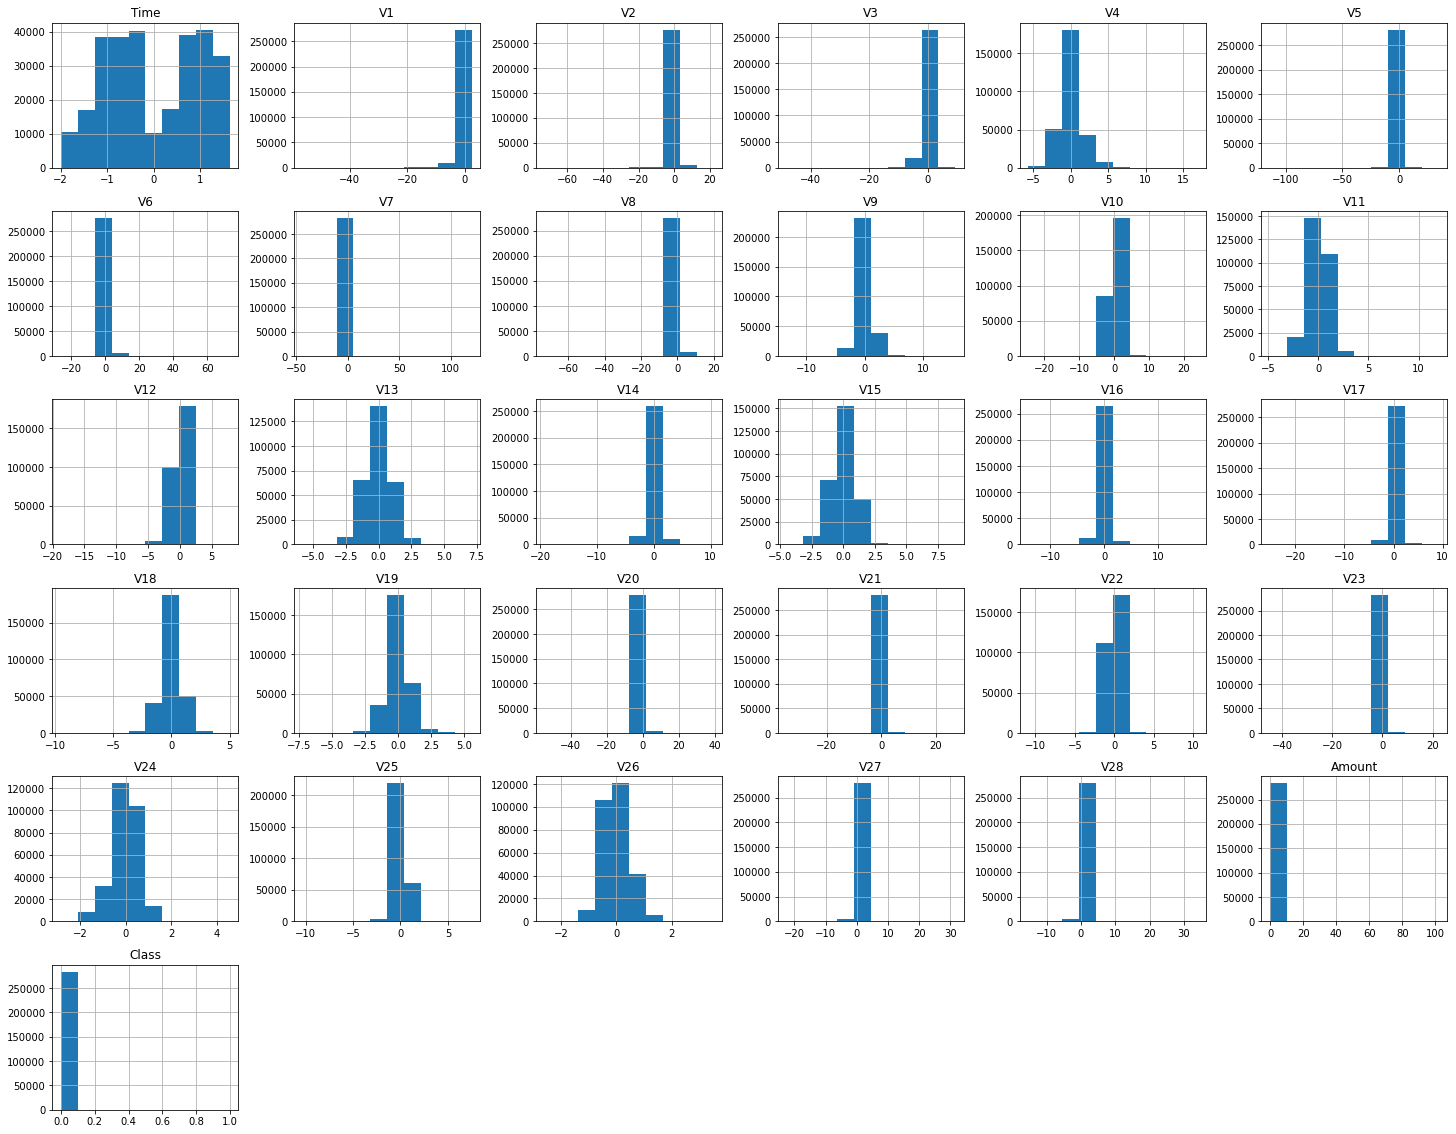

In [19]:
data.hist(figsize=(25,20))
plt.savefig('featureplot')

LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

Without SMOTE

In [23]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train,y_train)

In [24]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9914
           1       0.87      0.76      0.81        17

    accuracy                           1.00      9931
   macro avg       0.93      0.88      0.91      9931
weighted avg       1.00      1.00      1.00      9931



In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred) # first actual then predicted always.
cm

array([[9912,    2],
       [   4,   13]], dtype=int64)

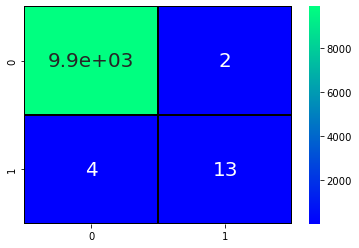

In [26]:
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [27]:
print('Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Precision for Logistic Regression:',(TP/(TP+FP)))
print('Recall for Logistic Regression:',(TP/(TP+FN)))
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score for Logistic Regression:',f1_score)

Accuracy for Logistic Regression: 0.9993958312355251
Precision for Logistic Regression: 0.9997982650796853
Recall for Logistic Regression: 0.99959661153691
F1 Score for Logistic Regression: 0.999697428139183


With SMOTE

In [28]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(X_train_sm,y_train_sm)

In [29]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      9914
           1       0.05      0.94      0.09        17

    accuracy                           0.97      9931
   macro avg       0.52      0.96      0.54      9931
weighted avg       1.00      0.97      0.98      9931



In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred) # first actual then predicted always.
cm

array([[9605,  309],
       [   1,   16]], dtype=int64)

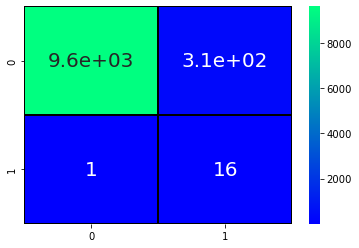

In [33]:
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [34]:
print('Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Precision for Logistic Regression:',(TP/(TP+FP)))
print('Recall for Logistic Regression:',(TP/(TP+FN)))
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score for Logistic Regression:',f1_score)

Accuracy for Logistic Regression: 0.9687846138354647
Precision for Logistic Regression: 0.9688319548113778
Recall for Logistic Regression: 0.9998958983968353
F1 Score for Logistic Regression: 0.9841188524590164


As SMOTE gave the best results so further All the models will be evaluated on the basis of the SMOTE technique used to handle the imbalanced datasets.

DECISION TREE

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [36]:
classifier = DecisionTreeClassifier(random_state=42) # shuffling of the data,selecting features at random
DT_pred=classifier.fit(X_train_sm, y_train_sm)


In [37]:
y_pred=DT_pred.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9914
           1       0.38      0.88      0.54        17

    accuracy                           1.00      9931
   macro avg       0.69      0.94      0.77      9931
weighted avg       1.00      1.00      1.00      9931



In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[9890,   24],
       [   2,   15]], dtype=int64)

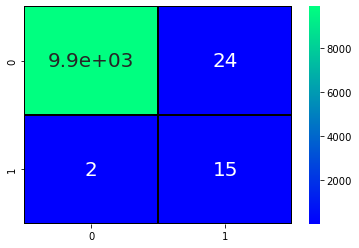

In [39]:
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [40]:
print('Accuracy for Decision Tree:',(TP+TN)/(TP+TN+FN+FP))
print('Precision for Decision Tree:',(TP/(TP+FP)))
print('Recall for Decision Tree:',(TP/(TP+FN)))
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score for Decision Tree:',f1_score)

Accuracy for Decision Tree: 0.9973819353539422
Precision for Decision Tree: 0.9975791809562236
Recall for Decision Tree: 0.9997978164173069
F1 Score for Decision Tree: 0.9986872664849036


RANDOM FOREST

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [42]:
RF_model=RandomForestClassifier(n_estimators=500,criterion='entropy',max_depth=8,min_samples_split=5,random_state=42)
RFC=RF_model.fit(X_train_sm,y_train_sm)

# n-estimators specifies the number of decision trees.(More trees generally improve performance by reducing overfitting, but they also increase computational cost.)
# criterion='entropy': This parameter defines the function to measure the quality of a split.By setting it to 'entropy', the algorithm uses the information gain (entropy) to decide where to split the data at each node.The other common option is 'gini', which uses the Gini impurity. Both are measures of impurity used to create the splits, but they differ slightly in how they penalize impurity.
# A max_depth of 8 means that each tree in the forest can have up to 8 levels.(Limiting the depth of the tree helps prevent overfitting by not allowing the trees to become too complex and capture too much noise from the training data.)
# This parameter specifies the minimum number of samples required to split an internal node.Setting min_samples_split to 5 means that a node must have at least 5 samples to be considered for splitting.This helps prevent the model from creating splits that are too specific to the training data, which can also help reduce overfitting.

In [43]:
y_pred=RFC.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9914
           1       0.31      0.94      0.47        17

    accuracy                           1.00      9931
   macro avg       0.66      0.97      0.73      9931
weighted avg       1.00      1.00      1.00      9931



In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[9879,   35],
       [   1,   16]], dtype=int64)

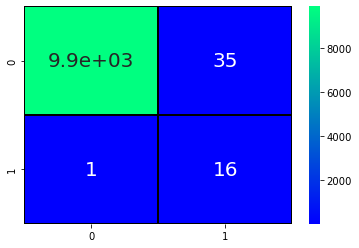

In [45]:
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [46]:
print('Accuracy for Random Forest:',(TP+TN)/(TP+TN+FN+FP))
print('Precision for Random Forest:',(TP/(TP+FP)))
print('Recall for Random Forest:',(TP/(TP+FN)))
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score for Random Forest:',f1_score)

Accuracy for Random Forest: 0.9963749874131508
Precision for Random Forest: 0.9964696388944926
Recall for Random Forest: 0.9998987854251012
F1 Score for Random Forest: 0.9981812670506214


SUPPORT VECTOR MACHINE

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
svm_model=SVC()
svm=svm_model.fit(X_train_sm,y_train_sm)

In [ ]:
y_pred=svm.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [ ]:
print('Accuracy for Support Vector Machines:',(TP+TN)/(TP+TN+FN+FP))
print('Precision for Support Vector Machines:',(TP/(TP+FP)))
print('Recall for Support Vector Machines:',(TP/(TP+FN)))
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score for Support Vector Machines:',f1_score)

KNN KNEAREST NEIGHBOURS

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [20]:
knn=KNeighborsClassifier(n_neighbors=3)
knn_model=knn.fit(X_train_sm,y_train_sm)
knn_model

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred=knn_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9914
           1       0.44      0.94      0.60        17

    accuracy                           1.00      9931
   macro avg       0.72      0.97      0.80      9931
weighted avg       1.00      1.00      1.00      9931



In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[9894,   20],
       [   1,   16]], dtype=int64)

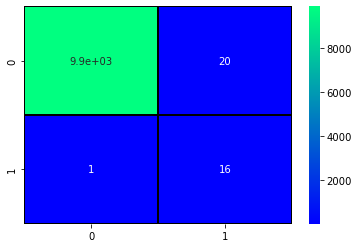

In [23]:
sns.heatmap(cm,annot=True,cmap="winter",linewidths=0.3,linecolor='black',) # annot_kws is a dictionary type parameter that accepts value for the key named size.
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [24]:
print('Accuracy for K Nearest Neighbours:',(TP+TN)/(TP+TN+FN+FP))
print('Precision for K Nearest Neighbours:',(TP/(TP+FP)))
print('Recall for K Nearest Neighbours:',(TP/(TP+FN)))
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score for K Nearest Neighbours:',f1_score)

Accuracy for K Nearest Neighbours: 0.9978854093243379
Precision for K Nearest Neighbours: 0.9979826507968529
Recall for K Nearest Neighbours: 0.9998989388580091
F1 Score for K Nearest Neighbours: 0.998939875814024


ANN(ARTIFICIAL NEURAL NETWORKS)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import classification_report
# precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimum amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True
)

In [ ]:
# Initialize the model
model = Sequential()

# Add layers to the model
input_dim = X_train.shape[1]  # Number of features
model.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=input_dim))
model.add(Dense(units=8, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model_trained = model.fit(X_train_sm, y_train_sm, batch_size=32, epochs=100, callbacks=[early_stopping], validation_split=0.2)

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

In [ ]:
sns.heatmap(cm,annot=True,cmap="winter",linewidths=0.3,linecolor='black',) # annot_kws is a dictionary type parameter that accepts value for the key named size.
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [ ]:
print('Testing Accuracy for ANN:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for ANN:',(TP/(TP+FN)))
print('Testing Specificity for ANN:',(TN/(TN+FP)))
print('Testing Precision for ANN:',(TP/(TP+FP)))

GRADIENT BOOSTING

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [26]:
gbm=GradientBoostingClassifier()
gbm.fit(X_train_sm,y_train_sm)

GradientBoostingClassifier()

In [27]:
y_pred=gbm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9914
           1       0.09      0.94      0.16        17

    accuracy                           0.98      9931
   macro avg       0.54      0.96      0.58      9931
weighted avg       1.00      0.98      0.99      9931



In [28]:
print('Accuracy for Gradient Boost:',(TP+TN)/(TP+TN+FN+FP))
print('Precision for Gradient Boost:',(TP/(TP+FP)))
print('Recall for Gradient Boost:',(TP/(TP+FN)))
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score for Gradient Boost:',f1_score)

Accuracy for Gradient Boost: 0.9978854093243379
Precision for Gradient Boost: 0.9979826507968529
Recall for Gradient Boost: 0.9998989388580091
F1 Score for Gradient Boost: 0.998939875814024


ADABOOST

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, learning_rate=1.0, random_state=42)
ada.fit(X_train_sm, y_train_sm)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [32]:
y_pred=ada.predict(X_test)
y_pred_proba = ada.predict_proba(X_test)[:, 1]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9914
           1       0.08      0.94      0.15        17

    accuracy                           0.98      9931
   macro avg       0.54      0.96      0.57      9931
weighted avg       1.00      0.98      0.99      9931



In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[9738,  176],
       [   1,   16]], dtype=int64)

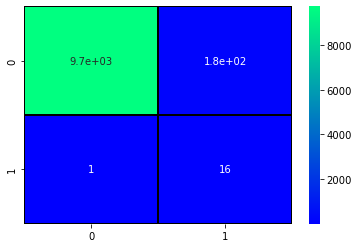

In [34]:
sns.heatmap(cm,annot=True,cmap="winter",linewidths=0.3,linecolor='black',) # annot_kws is a dictionary type parameter that accepts value for the key named size.
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [35]:
print('Accuracy for AdaBoost:',(TP+TN)/(TP+TN+FN+FP))
print('Precision for AdaBoost:',(TP/(TP+FP)))
print('Recall for AdaBoost:',(TP/(TP+FN)))
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score for AdaBoost:',f1_score)

Accuracy for AdaBoost: 0.9821770214479911
Precision for AdaBoost: 0.9822473270123059
Recall for AdaBoost: 0.9998973200533936
F1 Score for AdaBoost: 0.9909937414135246


XGBOOST

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [37]:
xgb_model=XGBClassifier(objective='binary:logistic',random_state=42)
xgb_model.fit(X_train_sm,y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [38]:
y_pred=xgb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9914
           1       0.67      0.94      0.78        17

    accuracy                           1.00      9931
   macro avg       0.83      0.97      0.89      9931
weighted avg       1.00      1.00      1.00      9931



In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[9906,    8],
       [   1,   16]], dtype=int64)

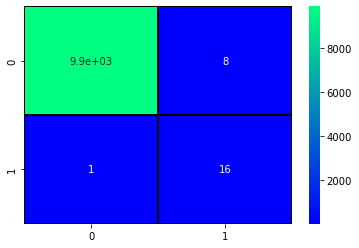

In [40]:
sns.heatmap(cm,annot=True,cmap="winter",linewidths=0.3,linecolor='black',) # annot_kws is a dictionary type parameter that accepts value for the key named size.
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [41]:
print('Accuracy for XGBoost:',(TP+TN)/(TP+TN+FN+FP))
print('Precision for XGBoost:',(TP/(TP+FP+1)))
print('Recall for XGBoost:',(TP/(TP+FN)))
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score for XGBoost:',f1_score)

Accuracy for XGBoost: 0.9990937468532877
Precision for XGBoost: 0.9990922844175492
Recall for XGBoost: 0.9998990612698092
F1 Score for XGBoost: 0.9995459361283487


NAIVE BAYES

In [42]:
# Gaussian is used for continuous features
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [43]:
nb_model=GaussianNB()
nb_model.fit(X_train_sm,y_train_sm)

GaussianNB()

In [44]:
y_pred=nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9914
           1       0.06      0.88      0.11        17

    accuracy                           0.98      9931
   macro avg       0.53      0.93      0.55      9931
weighted avg       1.00      0.98      0.99      9931



In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[9680,  234],
       [   2,   15]], dtype=int64)

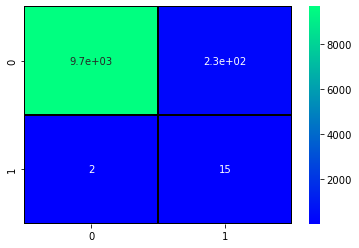

In [46]:
sns.heatmap(cm,annot=True,cmap="winter",linewidths=0.3,linecolor='black',) # annot_kws is a dictionary type parameter that accepts value for the key named size.
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [47]:
print('Accuracy for NaiveBayes:',(TP+TN)/(TP+TN+FN+FP))
print('Precision for NaiveBayes:',(TP/(TP+FP+1)))
print('Recall for NaiveBayes:',(TP/(TP+FN)))
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score for NaiveBayes:',f1_score)

Accuracy for NaiveBayes: 0.9762360285973215
Precision for NaiveBayes: 0.9762985375693394
Recall for NaiveBayes: 0.999793431109275
F1 Score for NaiveBayes: 0.9879567258624209


MLP(MULTI LAYER PERCEPTRON)

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [49]:
mlp_model=MLPClassifier(hidden_layer_sizes=(100,),max_iter=300, alpha=0.0001,
                          solver='adam', random_state=42)
mlp_model.fit(X_train_sm,y_train_sm)

MLPClassifier(max_iter=300, random_state=42)

In [50]:
y_pred=mlp_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9914
           1       0.84      0.94      0.89        17

    accuracy                           1.00      9931
   macro avg       0.92      0.97      0.94      9931
weighted avg       1.00      1.00      1.00      9931



In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[9911,    3],
       [   1,   16]], dtype=int64)

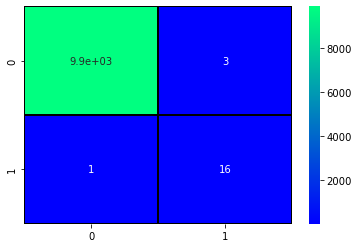

In [52]:
sns.heatmap(cm,annot=True,cmap="winter",linewidths=0.3,linecolor='black',) # annot_kws is a dictionary type parameter that accepts value for the key named size.
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

In [53]:
print('Accuracy for MLP:',(TP+TN)/(TP+TN+FN+FP))
print('Precision for MLP:',(TP/(TP+FP+1)))
print('Recall for MLP:',(TP/(TP+FN)))
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
print('F1 Score for MLP:',f1_score)

Accuracy for MLP: 0.9995972208236834
Precision for MLP: 0.9995965708522441
Recall for MLP: 0.9998991121872478
F1 Score for MLP: 0.9997982447291435


In [55]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    verbose=100,        # Shows training progress every 100 iterations
    random_seed=42
)

model.fit(X_train_sm, y_train_sm, eval_set=(X_test, y_test), early_stopping_rounds=50)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))






0:	test: 0.9981696	best: 0.9981696 (0)	total: 107ms	remaining: 53.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9990832928
bestIteration = 1

Shrink model to first 2 iterations.
Accuracy: 0.9777464505085087
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9914
           1       0.07      1.00      0.13        17

    accuracy                           0.98      9931
   macro avg       0.54      0.99      0.56      9931
weighted avg       1.00      0.98      0.99      9931



In [15]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred)
    
    print(confusion_matrix(y_val, y_pred))
    print(classification_report(y_val, y_pred))
    
    return {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1, 'AUC': auc}


In [16]:
# Logistic Regression
print("Logistic Regression")
lr = LogisticRegression(max_iter=1000, random_state=42)
results_lr = evaluate_model(lr, X_train_sm, y_train_sm, X_val, y_val)

# Decision Tree
print("Decision Tree")
dt = DecisionTreeClassifier(random_state=42)
results_dt = evaluate_model(dt, X_train_sm, y_train_sm, X_val, y_val)

# Random Forest
print("Random Forest")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
results_rf = evaluate_model(rf, X_train_sm, y_train_sm, X_val, y_val)

# Support Vector Machine
print("Support Vector Machine")
svm = SVC(probability=True, random_state=42)
results_svm = evaluate_model(svm, X_train_sm, y_train_sm, X_val, y_val)

# K-Nearest Neighbors
print("K-Nearest Neighbors")
knn = KNeighborsClassifier(n_neighbors=5)
results_knn = evaluate_model(knn, X_train_sm, y_train_sm, X_val, y_val)

# Naive Bayes
print("Naive Bayes")
nb = GaussianNB()
results_nb = evaluate_model(nb, X_train_sm, y_train_sm, X_val, y_val)

# Artificial Neural Network (MLP)
print("Artificial Neural Network (MLP)")
mlp = MLPClassifier(hidden_layer_sizes=(50,30), max_iter=500, random_state=42)
results_mlp = evaluate_model(mlp, X_train_sm, y_train_sm, X_val, y_val)

# Gradient Boosting
print("Gradient Boosting")
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
results_gbm = evaluate_model(gbm, X_train_sm, y_train_sm, X_val, y_val)

# AdaBoost
print("AdaBoost")
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
results_ada = evaluate_model(ada, X_train_sm, y_train_sm, X_val, y_val)

# XGBoost
print("XGBoost")
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
results_xgb = evaluate_model(xgboost_model, X_train_sm, y_train_sm, X_val, y_val)

Logistic Regression


NameError: name 'accuracy_score' is not defined

In [ ]:
import pandas as pd

results = pd.DataFrame({
    'LogisticRegression': results_lr,
    'DecisionTree': results_dt,
    'RandomForest': results_rf,
    'SVM': results_svm,
    'KNN': results_knn,
    'NaiveBayes': results_nb,
    'MLP': results_mlp,
    'GradientBoosting': results_gbm,
    'AdaBoost': results_ada,
    'XGBoost': results_xgb
})

results.T  # Transpose for readability
